# Import Statements

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import shapefile
import random
import math

# Class Declarations for Node, Edge and Graph

In [3]:
def assignNewColor():
    return random.randint(1,1000)

In [4]:
class Node:
    def __init__(self, x, y, name):
        self.x = x
        self.y = y
        self.name = name
        self.color = -1

    def displayNodeDetails(self):
        print(" Name : ", self.name, "\n", "X : ", self.x, "\n", "Y : ",
              self.y, "\n", "Color : ", self.color, "\n")

In [5]:
class Edge:
    def __init__(self, n1, n2, cost, impo):
        self.node1 = n1
        self.node2 = n2
        self.cost = cost
        self.importance = impo

    def displayEdgeDetails(self):
        print(" Point 1 : ", self.node1, "\n", "Point 2 : ", self.node2, "\n",
              "Cost    : ", self.cost, "\n", "Impo    : ", self.importance,
              "\n")

In [6]:
class Graph:

    curParent = None

    def __init__(self):
        self.nodes = []
        self.edges = []
        self.selected = []
        self.subs = []

    def addNode(self, x, y, name):
        temp = Node(x, y, name)
        self.nodes.append(temp)

    def addEdge(self, n1, n2, cost, impo):
        temp = Edge(n1, n2, cost, impo)
        self.edges.append(temp)

    def getCost(self, edge):
        return edge.cost

    def getNodeIndex(self, name):
        for i in self.nodes:
            if (i.name == name): return self.nodes.index(i)

    def nodeEdges(self, nodeName):
        return [
            e for e in self.edges
            if (e.node1 == nodeName or e.node2 == nodeName)
        ]

    def findNeighbours(self, nodeName):
        neds = []
        for e in self.selected:
            if (e.node1 == nodeName):
                neds.append(self.nodes[self.getNodeIndex(e.node2)])
            elif (e.node2 == nodeName):
                neds.append(self.nodes[self.getNodeIndex(e.node1)])
        return neds

    def formSubGraphs(self):
        for node in self.nodes:
            if (node.color == -1):
                node.color = assignNewColor()
            neigh = self.findNeighbours(node.name)
            for n in neigh:
                if (n.color != node.color):
                    n.color = node.color

    def spreadColors(self, node):
        neigh = self.findNeighbours(node.name)
        for n in neigh:
            if (n.color != node.color):
                n.color = node.color
                self.spreadColors(n)

    def findNoOfSubGraphs(self):
        cnt = 0
        seen = []
        for node in self.nodes:
            if (node.color not in seen):
                seen.append(node.color)
                cnt += 1
        return cnt, seen

    def selectMinNodeEdges(self):
        for node in self.nodes:
            neds = self.nodeEdges(node.name)
            choosen = sorted(neds, key=self.getCost)[0]
            if (choosen not in self.selected):
                self.selected.append(choosen)

    def finalMSTforming(self):
        self.subs = []
        no_of_sub, colors = self.findNoOfSubGraphs()
        if (no_of_sub > 1):
            for i in range(no_of_sub):
                nsub = [n.name for n in g.nodes if n.color == colors[i]]
                ls = [
                    e for e in self.edges
                    if (e.node1 in nsub and e.node2 not in nsub
                        and e not in self.subs and e not in self.selected)
                ]
                self.subs += ls
            try:
                smallest = sorted(self.subs, key=self.getCost)[0]
                self.selected.append(smallest)
                self.spreadColors(self.nodes[self.getNodeIndex(
                    smallest.node1)])
                self.finalMSTforming()
            except:
                pass

# Shapefile Extraction

In [7]:
class shpOperations:
    
    def __init__(self,vpath,rpath):
        self.vil = shapefile.Reader(vpath)
        self.rds = shapefile.Reader(rpath)
        self.vPoints = []
        self.rPoints = []
        self.rRecords = []
        self.rPointsNew = []
        
    def extractPoints(self):
        for i in range(len(self.vil.shapes())):
            self.vPoints.append(self.vil.shape(i).points[0])
        for i in range(len(self.rds.shapes())):
            self.rPoints.append(self.rds.shape(i).points)
        for i in range(len(self.rds.records())):
            lst = []
            for j in range(1,len(self.rds.fields)):
                try:
                    lst.append((self.rds.fields[j][0],self.rds.record(i)[j-1]))
                except:
                    pass
            self.rRecords.append(lst)
        self.intersections = {k: [] for k in range(1,len(self.rPoints)+1)}
        self.rPointsNew = self.rPoints
        
    def print_roads(self):
        for i in self.rPointsNew:
            print(len(i),"\n",i,"\n")
    
#     def formLineEq(self,p1, p2):
#         A = (p1[1] - p2[1])
#         B = (p2[0] - p1[0])
#         C = (p1[0]*p2[1] - p2[0]*p1[1])
#         return A, B, -C

#     def getCurIntersection(self,pt1,pt2,pt3,pt4):
#         L1 = self.formLineEq(pt1,pt2)
#         L2 = self.formLineEq(pt3,pt4)
#         D  = L1[0] * L2[1] - L1[1] * L2[0]
#         Dx = L1[2] * L2[1] - L1[1] * L2[2]
#         Dy = L1[0] * L2[2] - L1[2] * L2[0]
#         if D != 0:
#             x = Dx / D
#             y = Dy / D
#             if(x>=min(pt1[0],pt2[0]) and x<=max(pt1[0],pt2[0]) 
#                and x>=min(pt3[0],pt4[0]) and x<=max(pt3[0],pt4[0])
#                and y>=min(pt1[1],pt2[1]) and y<=max(pt1[1],pt2[1])
#                and y>=min(pt3[1],pt4[1]) and y<=max(pt3[1],pt4[1])):
#                 return (x,y)
#         else:
#             return None
    
#     def findIntersections(self):
#         for i in range(len(self.rPointsNew)):
#             print("I : ", i+1, " has ", len(self.rPointsNew[i]))
#             for j in range(len(self.rPointsNew[i])-1):
#                 pt1 = self.rPointsNew[i][j]
#                 pt2 = self.rPointsNew[i][j+1]
#                 for k in range(i+1,len(self.rPointsNew)):
#                     for l in range(len(self.rPointsNew[k])-1):
#                         pt3 = self.rPointsNew[k][l]
#                         pt4 = self.rPointsNew[k][l+1]
#                         newPt = self.getCurIntersection(pt1,pt2,pt3,pt4)
#                         if(newPt != None): 
#                             if(newPt not in self.intersections[i+1]): 
#                                 self.intersections[i+1].append(newPt)
#                                 self.rPointsNew[i].insert(j+1,newPt)
#                             if(newPt not in self.intersections[k+1]): 
#                                 self.intersections[k+1].append(newPt)
#                                 self.rPointsNew[k].insert(l+1,newPt)

In [8]:
obj = shpOperations("../Data/Villages.shp","../Data/Road_Network.shp")

In [9]:
obj.extractPoints()

In [44]:
print(obj.rRecords[0])

[('Name', 'MR1'), ('PREFIX', 'Dharampur Chauk'), ('PRE_Type', 'Chauk'), ('SUFFIX', 'Race Course End'), ('FULL_NAME', 'Race Course to Dharampur Road'), ('Oneway', 'T'), ('Shape_Leng', 78.307448375), ('FT_SpeedLi', 80), ('TF_SpeedLi', 80), ('FT_Time', 0.0587305862812), ('TF_Time', 0.0587305862812)]


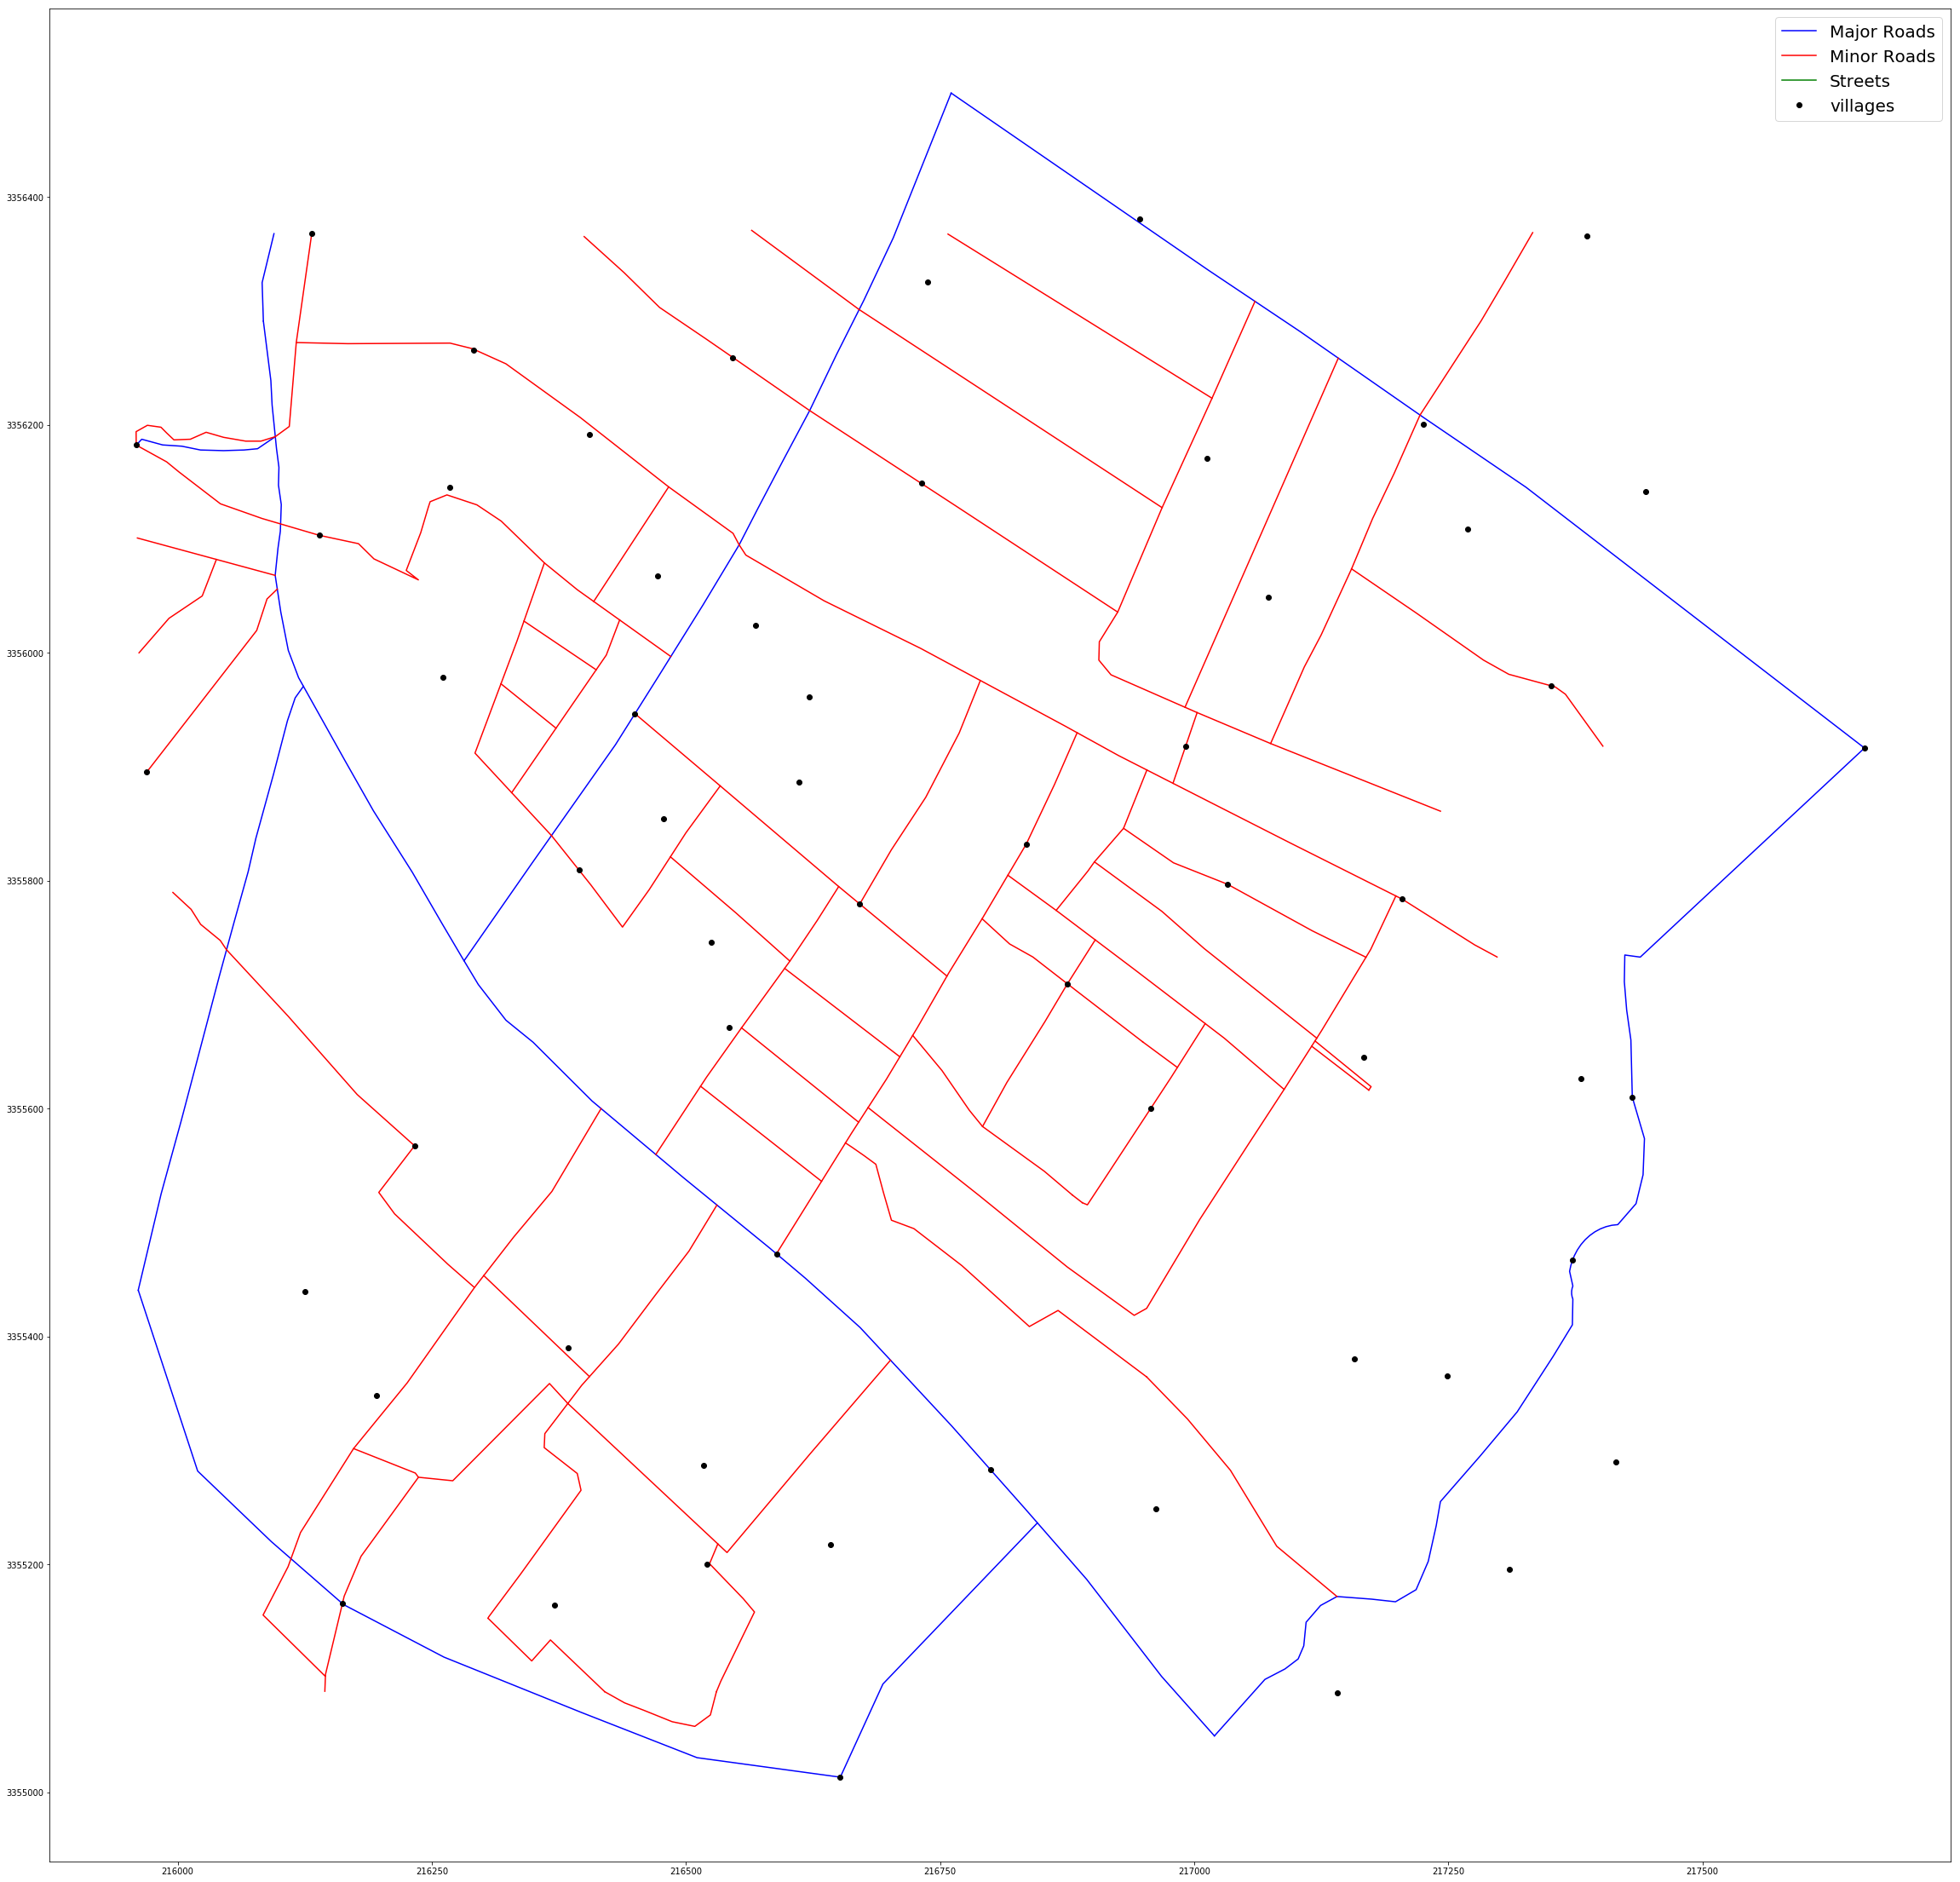

In [76]:
x,y,allTypes = [], [], []
majorRoads, minorRoads, street = [],[], []
plt.figure(figsize = (40,40))
for roadDetails in obj.rRecords:
    if 'MR' in roadDetails[0][1]:
        allTypes.append(1)
    elif 'Minor' in roadDetails[0][1]:
        allTypes.append(2)
    elif 'Street' in roadDetails[0][1]:
        allTypes.append(3)
i = 0
#printing all roads
for road in obj.rPoints:
    road = np.array(road)
    x = road[:,0]
    y = road[:,1]
    if allTypes[i] == 1:
        hnd1, = plt.plot(x,y,color='blue',label="Major Roads")
        majorRoads.append((road))
    elif allTypes[i] == 2:
        hnd2, = plt.plot(x,y,color='red',label="Minor Roads")
        minorRoads.append((road))
    elif allTypes[i] == 3:
        #hnd3, = plt.plot(x,y,color='green',label="Streets")
        street.append((road))
    i = i+1    
#printing all villages
hnd4, = plt.plot(vPoints[:,0], vPoints[:,1], 'ko', label='villages')
plt.legend(handles=[hnd1,hnd2,hnd3,hnd4],fontsize = 20)
plt.show()

In [103]:
vOnMajorRoad,intersection = [],[]
for village in obj.vPoints:
    village = np.array(village)
    for road in majorRoads:
        for pointOnRoad in road:
            if np.array_equal(pointOnRoad,village):
                print("Village lies on Major Road")
                vOnMajorRoad.append((pointOnRoad))
                intersection.append((village))
vOnMajorRoad = np.array(vOnMajorRoad)
print(vOnMajorRoad.shape)

Village lies on Major Road
Village lies on Major Road
Village lies on Major Road
Village lies on Major Road
Village lies on Major Road
Village lies on Major Road
Village lies on Major Road
Village lies on Major Road
Village lies on Major Road
(9, 2)


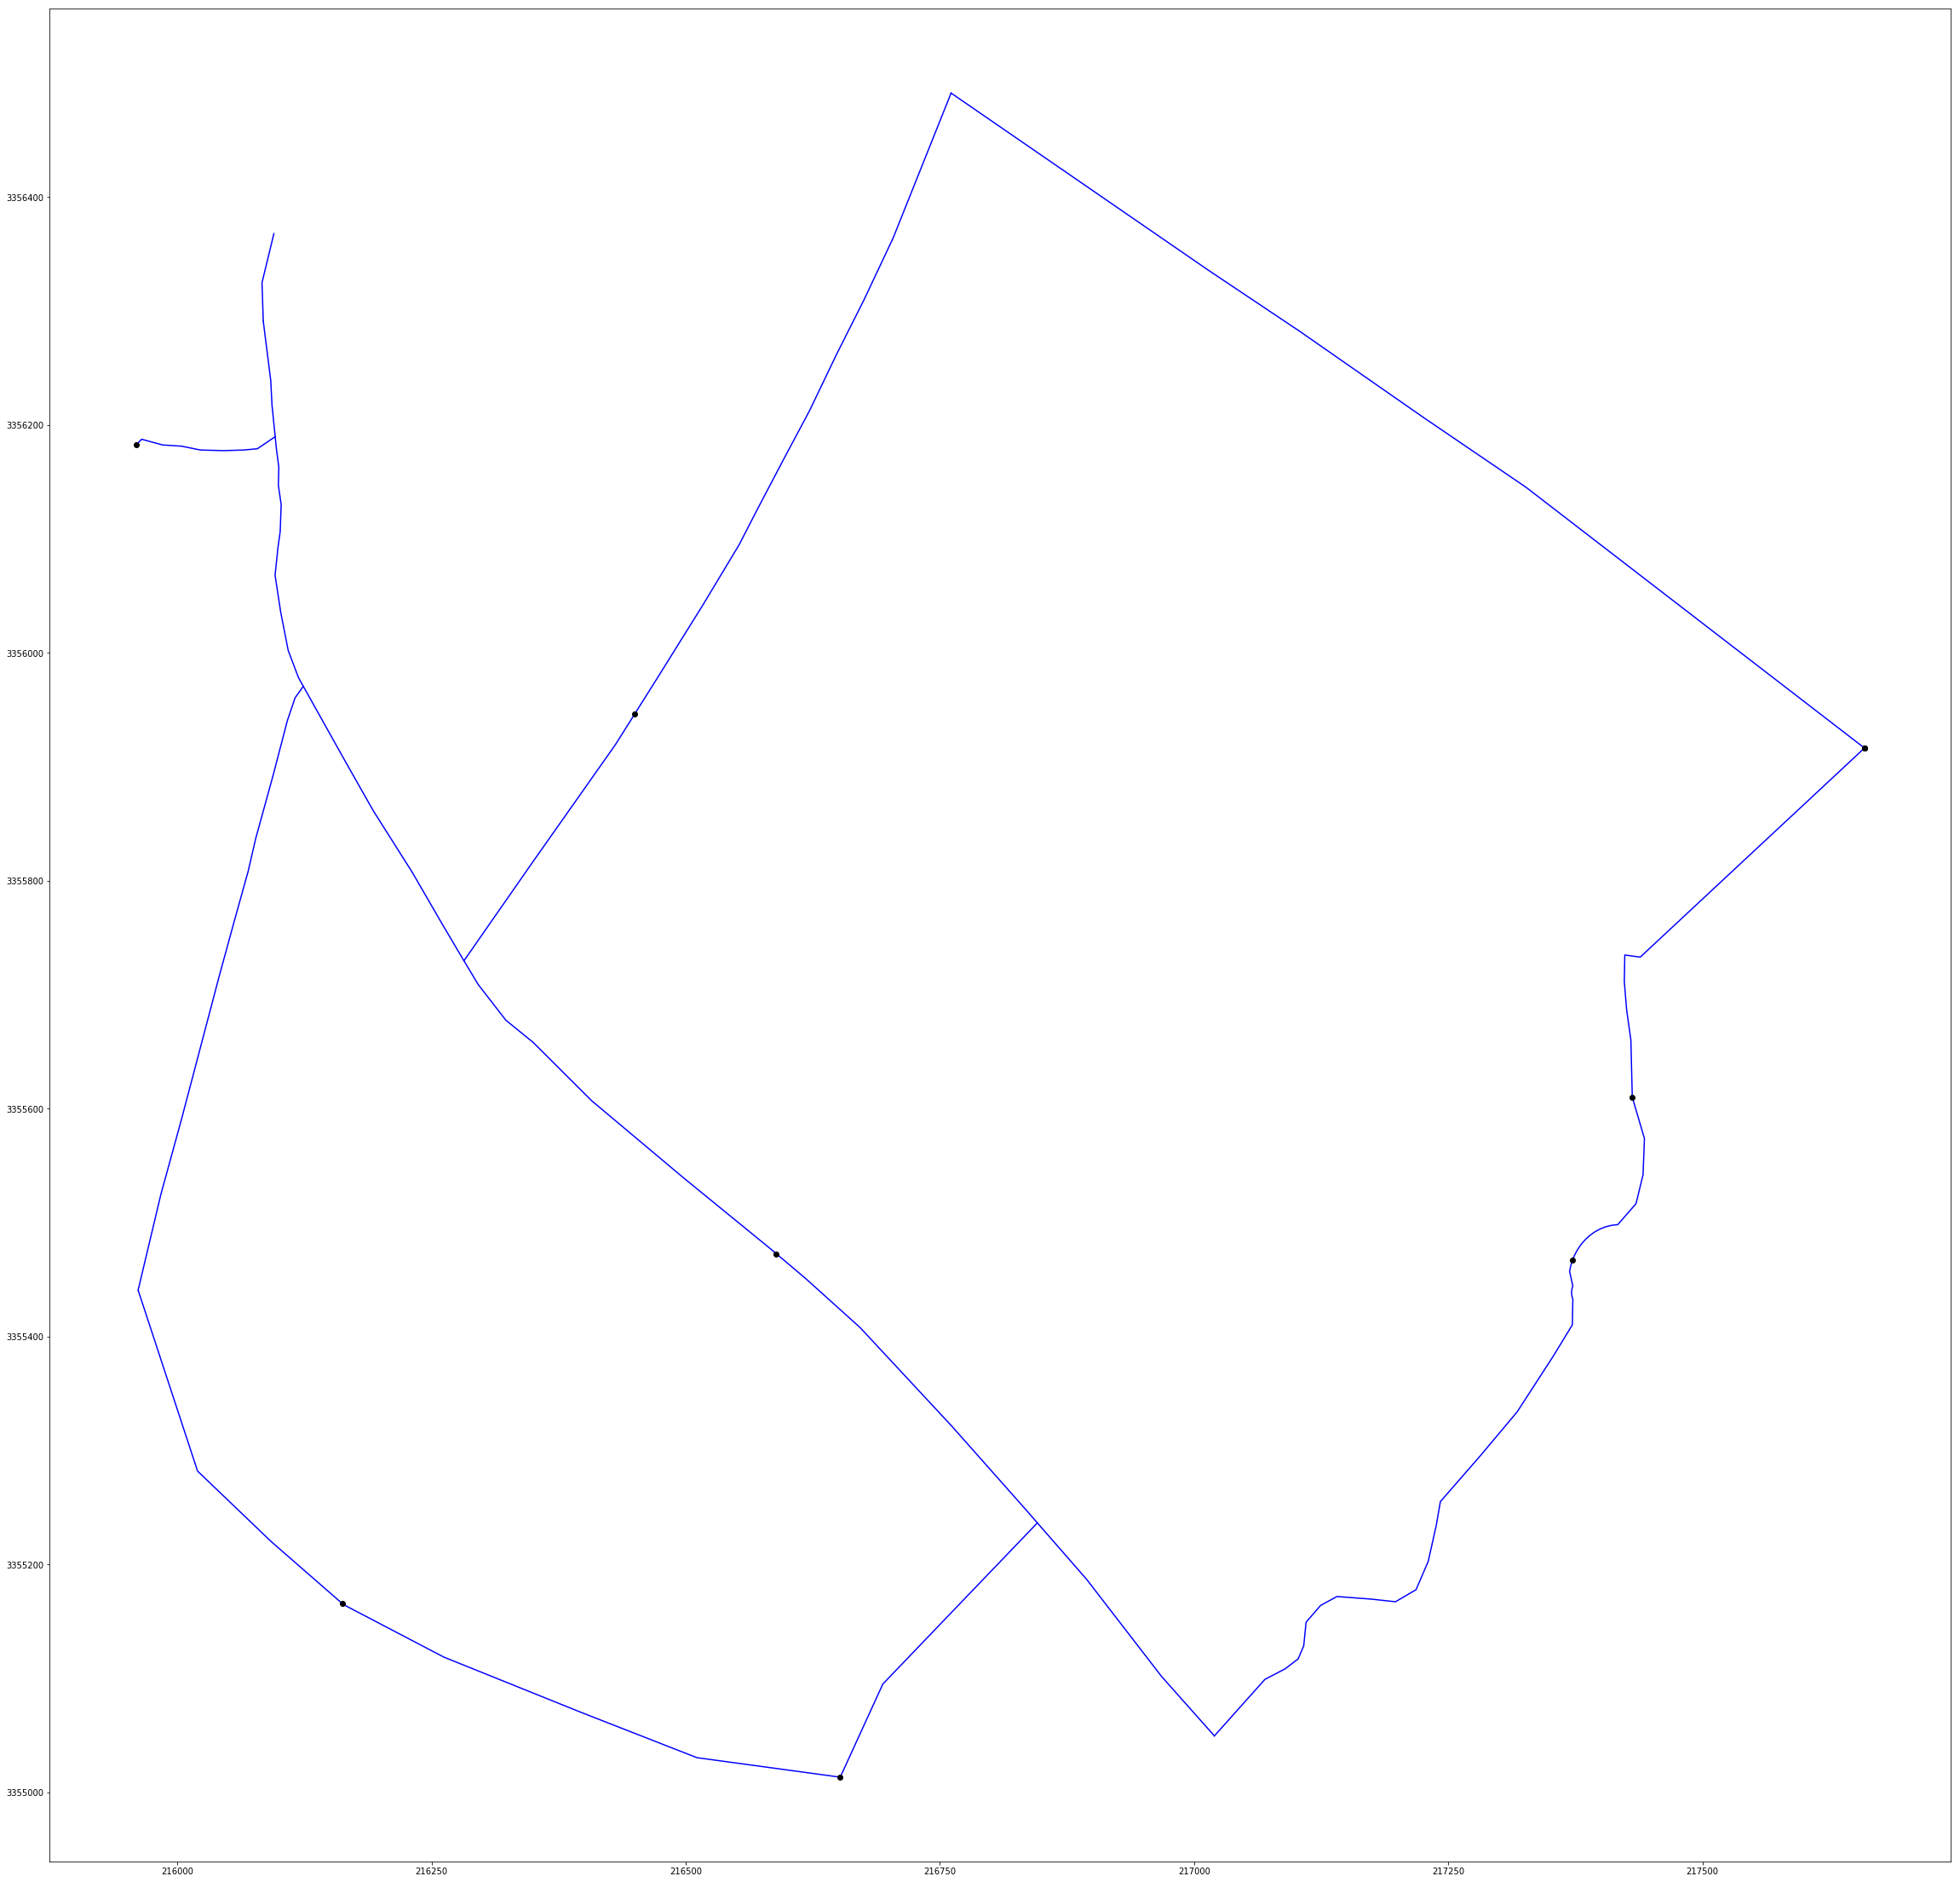

In [104]:
plt.figure(figsize=(40, 40))
i = 0
for road in obj.rPoints:
    road = np.array(road)
    x = road[:,0]
    y = road[:,1]
    if allTypes[i] == 1:
        hnd1, = plt.plot(x,y,color='blue',label="Major Roads")
        i = i + 1
        
hnd4, = plt.plot(vOnMajorRoad[:,0], vOnMajorRoad[:,1], 'ko', label='villages')        
plt.show()

### Fields of each road
<ul>
    <li>Name</li>
    <li>PREFIX</li>
    <li>PRE_Type</li>
    <li>SUFFIX</li>
    <li>FULL_NAME</li>
    <li>Oneway</li>
    <li>Shape_Leng</li>
    <li>FT_SpeedLi</li>
    <li>TF_SpeedLi</li>
    <li>FT_Time</li>
    <li>TF_Time</li>  
</ul>

# Operations on extracted points

In [63]:
obj.findIntersections()

I :  1  has  3
I :  2  has  43
I :  3  has  15
I :  4  has  20
I :  5  has  10
I :  6  has  53
I :  7  has  14
I :  8  has  10
I :  9  has  20
I :  10  has  17
I :  11  has  14
I :  12  has  6
I :  13  has  7
I :  14  has  2
I :  15  has  6
I :  16  has  8
I :  17  has  2
I :  18  has  6
I :  19  has  5
I :  20  has  6
I :  21  has  11
I :  22  has  6
I :  23  has  9
I :  24  has  8
I :  25  has  7
I :  26  has  2
I :  27  has  2
I :  28  has  2
I :  29  has  7
I :  30  has  13
I :  31  has  11
I :  32  has  2
I :  33  has  3
I :  34  has  16
I :  35  has  10
I :  36  has  3
I :  37  has  4
I :  38  has  2
I :  39  has  5
I :  40  has  2
I :  41  has  2
I :  42  has  8
I :  43  has  15
I :  44  has  2
I :  45  has  8
I :  46  has  4
I :  47  has  18
I :  48  has  21
I :  49  has  4
I :  50  has  8
I :  51  has  6
I :  52  has  14
I :  53  has  9
I :  54  has  2
I :  55  has  6
I :  56  has  2
I :  57  has  4
I :  58  has  4
I :  59  has  5
I :  60  has  15
I :  61  has  7
I :  62  has 

I :  527  has  14
I :  528  has  2
I :  529  has  8
I :  530  has  2
I :  531  has  11
I :  532  has  2
I :  533  has  2
I :  534  has  2
I :  535  has  4
I :  536  has  4
I :  537  has  8
I :  538  has  19
I :  539  has  8
I :  540  has  6
I :  541  has  2


In [76]:
cnt = 0
for key in obj.intersections.keys():
    print(obj.intersections[key])
    cnt+=len(obj.intersections[key])

[]
[(216632.11268181403, 3355439.493074121), (216664.70579804422, 3355413.307098927), (216820.49065536592, 3355262.157063596)]
[]
[(216594.6368253653, 3356167.2307009688), (216696.27364319022, 3356349.6205732017)]
[(216944.14530549184, 3356378.8498055483), (217305.33626821556, 3356158.2533644782)]
[(217252.44210938993, 3355265.5208872), (217435.66257694748, 3355596.090899169)]
[(215961.31670089994, 3355440.5688968347), (216691.99034786393, 3355091.3942881133)]
[(216096.09189109865, 3356189.7957949187), (216096.09187556518, 3356189.795785506)]
[(216572.86779391507, 3356078.639089452), (216604.3055783659, 3356062.251270958), (216820.95101132628, 3355960.807214463), (217058.79058810478, 3355849.4304522364)]
[]
[(216960.36392128, 3355709.1511252318), (217040.89952904274, 3355653.28441645)]
[(217068.26699821642, 3355699.083765008), (217068.16363421976, 3355699.157159748)]
[]
[]
[]
[(217064.57454887676, 3355584.1095637563), (216852.3936106436, 3355477.553621213)]
[]
[(216757.98799870798, 335

In [72]:
cnt = 0
for i in obj.rPoints:
    cnt+=len(i)

In [77]:
cnt

150

In [74]:
cnt = 0
for i in obj.rPointsNew:
    cnt+=len(i)

In [75]:
cnt

3501